QUESTION 1: Assessing Genre preferences among players: What are the most preffered game genres among viewers/players on STEAM on the basis of the current number of players playing games?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/divjot21/final_0_80509.csv",parse_dates=True,low_memory=False)
data

,Index,AppID,Title,Initial_Price,Final_Price,Discount_Percent,Developers,Publishers,Genres,Categories,...,Subtitle_Languages,Positive_Reviews,Negative_Reviews,Total_Reviews,Overall_Review_Summary,Recent_Reviews,Recent_Review_Summary,Mature_Content_Desc,Awards,Curators
0,0,20200,Galactic Bowling,NaN,NaN,NaN,['Perpetual FX Creative'],['Perpetual FX Creative'],"['Casual', 'Indie', 'Sports']","['Single-player', 'Multi-player', 'Steam Achie...",...,['English'],6,11,12,Mostly Negative,NaN,NaN,NaN,NaN,6.0
1,1,655370,Train Bandit,52.0,52.0,0.0,['Rusty Moyher'],['Wild Rooster'],"['Action', 'Indie']","['Single-player', 'Steam Achievements', 'Full ...",...,"['English', 'French', 'Italian', 'German', 'Sp...",57,7,53,Very Positive,NaN,NaN,NaN,NaN,8.0
2,2,1732930,Jolt Project,199.0,199.0,0.0,['Campião Games'],['Campião Games'],"['Action', 'Adventure', 'Indie', 'Strategy']",['Single-player'],...,['English'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,1355720,Henosis™,NaN,NaN,NaN,['Odd Critter Games'],['Odd Critter Games'],"['Adventure', 'Casual', 'Indie']","['Single-player', 'Full controller support']",...,['English'],5,0,5,5 user reviews,NaN,NaN,NaN,NaN,5.0
4,4,1139950,Two Weeks in Painland,0.0,0.0,0.0,['Unusual Games'],['Unusual Games'],"['Adventure', 'Indie']","['Single-player', 'Steam Achievements']",...,"['English', 'Spanish - Spain']",53,6,59,Very Positive,NaN,NaN,This Game may contain content not appropriate ...,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80505,80505,574674,VRC PRO Deluxe Off-road tracks 4,570.0,285.0,50.0,['Virtual Racing Industries Ltd.'],['Virtual Racing Industries Ltd.'],"['Action', 'Casual', 'Indie', 'Racing', 'Simul...","['Single-player', 'Multi-player', 'Downloadabl...",...,['English'],0,1,1,1 user reviews,NaN,NaN,NaN,NaN,NaN
80506,80506,947930,Car Mechanic Simulator 2018 - Porsche DLC,300.0,36.0,88.0,['Red Dot Games'],['PlayWay S.A.'],"['Racing', 'Simulation']","['Single-player', 'Downloadable Content', 'Ste...",...,"['English', 'French', 'Italian', 'German', 'Sp...",67,7,70,Very Positive,NaN,NaN,NaN,NaN,1.0
80507,80507,1900780,Erannorth Chronicles - Ancient Ruins,450.0,360.0,20.0,['Spyridon Thalassinos'],['Spyridon Thalassinos'],"['Adventure', 'Indie', 'RPG', 'Strategy']","['Single-player', 'Downloadable Content', 'Ste...",...,['English'],10,0,10,Positive,NaN,NaN,NaN,NaN,NaN
80508,80508,2470521,Crossout — Electric beetle (Lite edition),1199.0,1199.0,0.0,['Targem Games'],['Gaijin Distribution KFT'],"['Action', 'Free to Play', 'Massively Multipla...","['Multi-player', 'MMO', 'PvP', 'Online PvP', '...",...,['English'],3,19,21,Negative,NaN,NaN,NaN,NaN,NaN


In [3]:
x = data[['AppID','Title','Genres', 'Current_Players']]
x.dropna(inplace=True)
x.info()
x.reset_index(inplace=True)
x

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75159 entries, 0 to 80509
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AppID            75159 non-null  int64  
 1   Title            75159 non-null  object 
 2   Genres           75159 non-null  object 
 3   Current_Players  75159 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ MB


/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5550/1237054627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)


,index,AppID,Title,Genres,Current_Players
0,0,20200,Galactic Bowling,"['Casual', 'Indie', 'Sports']",0.0
1,1,655370,Train Bandit,"['Action', 'Indie']",0.0
2,2,1732930,Jolt Project,"['Action', 'Adventure', 'Indie', 'Strategy']",0.0
3,3,1355720,Henosis™,"['Adventure', 'Casual', 'Indie']",0.0
4,4,1139950,Two Weeks in Painland,"['Adventure', 'Indie']",0.0
...,...,...,...,...,...
75154,80505,574674,VRC PRO Deluxe Off-road tracks 4,"['Action', 'Casual', 'Indie', 'Racing', 'Simul...",0.0
75155,80506,947930,Car Mechanic Simulator 2018 - Porsche DLC,"['Racing', 'Simulation']",0.0
75156,80507,1900780,Erannorth Chronicles - Ancient Ruins,"['Adventure', 'Indie', 'RPG', 'Strategy']",0.0
75157,80508,2470521,Crossout — Electric beetle (Lite edition),"['Action', 'Free to Play', 'Massively Multipla...",0.0


In [4]:
genre_dict = {}


n = 75159
for i in range(n):
    genres = eval(x['Genres'][i])
    for genre in genres:
        if genre not in genre_dict:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += x['Current_Players'][i]
    
genre_dict

{'Casual': 521578.0,
 'Indie': 1114434.0,
 'Sports': 328793.0,
 'Action': 3829249.0,
 'Adventure': 2030641.0,
 'Strategy': 1470219.0,
 'Free to Play': 2676752.0,
 'Massively Multiplayer': 959791.0,
 'RPG': 1321184.0,
 'Simulation': 1040704.0,
 'Early Access': 282874.0,
 'Racing': 100162.0,
 'Utilities': 133355.0,
 'Education': 7390.0,
 'Sexual Content': 16.0,
 'Nudity': 26.0,
 'Violent': 108.0,
 'Gore': 42.0,
 'Design & Illustration': 106797.0,
 'Animation & Modeling': 115040.0,
 'Game Development': 11299.0,
 'Web Publishing': 11809.0,
 'Software Training': 10939.0,
 'Photo Editing': 85639.0,
 'Audio Production': 14920.0,
 'Video Production': 36107.0,
 'Accounting': 12.0,
 'Movie': 9.0,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

As we can see, the genres Sexual Content, Nudity, Violent, Gore, Accounting, Movie, Documentary, Episodic, Short, Tutorial, 360 Video have too little values as compared to the other genres (which have values in lakhs). So, we ignore these for plotting purposes. Now, we will plot a bar graph.

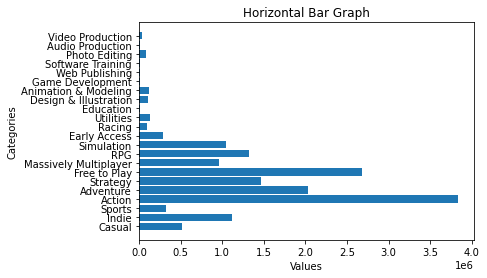

In [12]:
filtered_dict = {key: value for key, value in genre_dict.items() if value > 108}
keys = list(filtered_dict.keys())
values = list(filtered_dict.values())
plt.barh(keys, values)

plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')
plt.show()

The three most preffered game genres among viewers/players on STEAM on the basis of the current number of players playing games are:

Action: 3,829,249.0

Adventure: 2,030,641.0

Free to Play: 2,676,752.0